In [1]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

wl = np.linspace(380, 780, 401)
R05 = pd.read_csv('./spectrum/TPK/R_5_B.csv')['SCAN'].values

air = ml.Non_Dispersion(1)
sub = ml.Non_Dispersion(1.52)
def hypo(th):
    SiON_L = ml.Chromatic_Dispersion(th[6], th[7], 550)
    SiON_H = ml.Chromatic_Dispersion(th[8], th[9], 550)
    ITO = ml.Chromatic_Dispersion(th[10], th[11], 550)
    Arc = ml.Chromatic_Dispersion(th[12], th[13], 550)
    hypo_R = tm.Design(
        [air, Arc, SiON_H, SiON_L, ITO, SiON_L, SiON_H, sub],
        [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
    )
    RRR = hypo_R.reflectance(wl, 5)
    return RRR

def hypo_tra(th):
    SiON_L = ml.Chromatic_Dispersion(th[6], th[7], 550)
    SiON_H = ml.Chromatic_Dispersion(th[8], th[9], 550)
    Arc = ml.Chromatic_Dispersion(th[12], th[13], 550)
    hypo_R = tm.Design(
        [air, Arc, SiON_H, SiON_L, SiON_L, SiON_H, sub],
        [None, th[0], th[1], th[2], th[4], th[5], None]
    )
    RRR = hypo_R.reflectance(wl, 5)
    return RRR

fom = lambda th: tm.RMSE(100*hypo(th),R05)

In [9]:
sol = differential_evolution(
    fom, [
        (900,1300),
        (20.24,28.25),
        (13.81,22.81),
        (42.64,50.64),
        (12.11,20.11),
        (20.59,28.59),
        (1.44,1.55), (-0.2,0),
        (1.7,2.1), (-1,0),
        (1.8,1.9), (-1,0),
        (1.48,1.55), (-0.2,0),
    ], disp=True, polish=False, popsize=20, mutation=0.3, recombination =0.9,strategy = 'best1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 1.32743
differential_evolution step 2: f(x)= 1.09701
differential_evolution step 3: f(x)= 0.966485
differential_evolution step 4: f(x)= 0.938019
differential_evolution step 5: f(x)= 0.938019
differential_evolution step 6: f(x)= 0.917695
differential_evolution step 7: f(x)= 0.898501
differential_evolution step 8: f(x)= 0.889555
differential_evolution step 9: f(x)= 0.815192
differential_evolution step 10: f(x)= 0.795118
differential_evolution step 11: f(x)= 0.795097
differential_evolution step 12: f(x)= 0.785823
differential_evolution step 13: f(x)= 0.779551
differential_evolution step 14: f(x)= 0.779551
differential_evolution step 15: f(x)= 0.775074
differential_evolution step 16: f(x)= 0.768881
differential_evolution step 17: f(x)= 0.767236
differential_evolution step 18: f(x)= 0.763318
differential_evolution step 19: f(x)= 0.762672
differential_evolution step 20: f(x)= 0.762044
differential_evolution step 21: f(x)= 0.761248
differential_evolution s

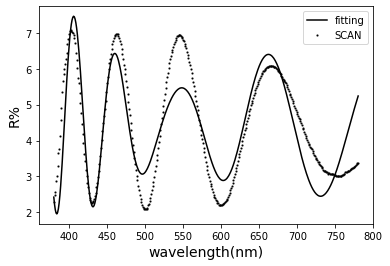

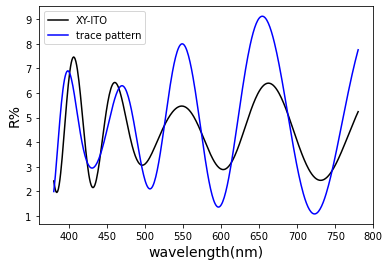

xy-ITO: 4.350240407558917
trace pattern: 4.747102265127239
delta_d_t: 1.2549174722769048


In [10]:
m1 = [
    9.51947094e+02,
    2.82486970e+01,
    2.28005594e+01,
    5.06274016e+01,
    2.01039707e+01,
    2.19036286e+01,
    1.44167869e+00,-2.72081849e-05,
    1.78131747e+00,-3.31244714e-05,
    1.60769745e+00,-8.21466725e-01,
    1.51985969e+00,-7.38408487e-05
]
tk = sol.x

plt.plot(wl, 100*hypo(tk),'-k', label = 'fitting')
plt.plot(wl, R05, 'ks', label = 'SCAN', markersize = 1)
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('TPK_R_5_B.png')
plt.show()
plt.plot(wl, 100*hypo(tk),'-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk),'-b', label = 'trace pattern')
plt.legend(loc = 'best')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.savefig('TPK_delta_d_t.png')
plt.show()
print('xy-ITO:',np.mean(100*hypo(tk)))
print('trace pattern:',np.mean(100*hypo_tra(tk)))
print('delta_d_t:', np.mean(100*abs(hypo(tk)-hypo_tra(tk))))

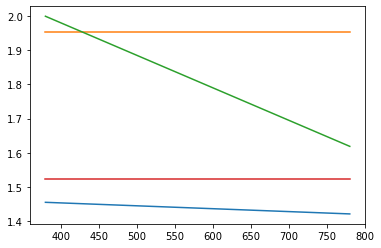

1.8376563959335082


In [12]:
xSiON_L = ml.Chromatic_Dispersion(tk[6], tk[7], 550)
xSiON_H = ml.Chromatic_Dispersion(tk[8], tk[9], 550)
xITO = ml.Chromatic_Dispersion(tk[10], tk[11], 550)
xArc = ml.Chromatic_Dispersion(tk[12], tk[13], 550)

plt.plot(wl, xSiON_L.nvalues(wl))
plt.plot(wl, xSiON_H.nvalues(wl))
plt.plot(wl, xITO.nvalues(wl))
plt.plot(wl, xArc.nvalues(wl))
plt.show()
print(xITO.nvalues(550))